In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from cmocean import cm

import warnings
warnings.filterwarnings("ignore")

In [3]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

In [4]:
def calc_stats(x, y):
    stats = {}
    MSE = np.mean((y - x)**2)
    stats['RMSE'] = np.sqrt(MSE)
    stats['bias'] = np.mean(y) - np.mean(x)
    stats['WSS'] = 1 - MSE / np.mean((abs(y - np.mean(x)) + abs(x - np.mean(x)))**2)
    
    return stats


def plot_panel(ax, x, y, lims, units):
    stats = calc_stats(x, y)

    statstext = f"RMSE = {stats['RMSE']:.3f} {units}\nbias = {stats['bias']:.3f} {units}\nWSS = {stats['WSS']:.3f}"
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.9)
    c = ax.text(0.5, 0.04, statstext, bbox=props, transform=ax.transAxes, fontsize=9)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    return c

In [7]:
ctd2017 = pd.read_csv('dfo_ctd_2017.csv')
# ctd2018 = pd.read_csv('dfo_ctd_2018.csv')
# ctd2019 = pd.read_csv('dfo_ctd_2019.csv')
ctd2020 = pd.read_csv('dfo_ctd_2020.csv')
# ctd2021 = pd.read_csv('dfo_ctd_2021.csv')

# dfo_ctd = pd.concat([ctd2017, ctd2018, ctd2019, ctd2020, ctd2021], ignore_index=True)
dfo_ctd = pd.concat([ctd2017,ctd2020], ignore_index=True)


Evaluation of LiveOcean compared to all DFO CTD casts (2017-2021):


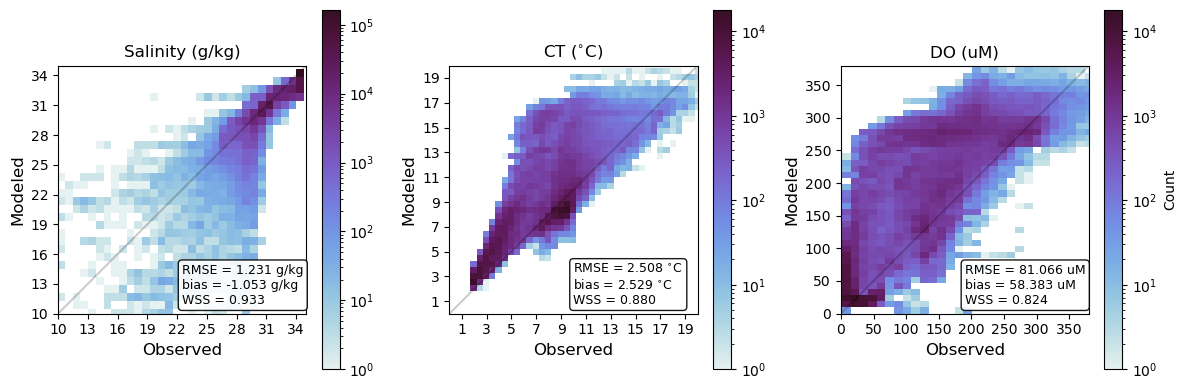

In [8]:
print("Evaluation of LiveOcean compared to all DFO CTD casts (2017-2021):")

fig, axs = plt.subplots(1, 3, figsize = (12, 4))

axs[0].plot((10,35),(10,35),'k-',alpha=.2)
axs[1].plot((0,20),(0,20),'k-',alpha=.2)
axs[2].plot((0,380),(0,380),'k-',alpha=.2)


iiT=(~np.isnan(dfo_ctd['CT']))&(~np.isnan(dfo_ctd['CT_model']))
iiS=(~np.isnan(dfo_ctd['SA']))&(~np.isnan(dfo_ctd['SA_model']))
iiO=(~np.isnan(dfo_ctd['DO (uM)']))&(~np.isnan(dfo_ctd['DO_model']))

counts, xedges, yedges, m1=axs[1].hist2d(dfo_ctd.loc[iiT,['CT']].values.flatten(),
                                      dfo_ctd.loc[iiT,['CT_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)
counts, xedges, yedges, m2=axs[0].hist2d(dfo_ctd.loc[iiS,['SA']].values.flatten(),
                                      dfo_ctd.loc[iiS,['SA_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)
counts, xedges, yedges, m3=axs[2].hist2d(dfo_ctd.loc[iiO,['DO (uM)']].values.flatten(),
                                      dfo_ctd.loc[iiO,['DO_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

cb0=fig.colorbar(m2,ax=axs[0])
# cb0.set_label('Count')
cb1=fig.colorbar(m1,ax=axs[1])
# cb1.set_label('Count')
cb2=fig.colorbar(m3,ax=axs[2])
cb2.set_label('Count')

ntick=np.arange(10, 35, 3)
axs[0].set_xlim((10,35))
axs[0].set_ylim((10,35))
axs[0].set_xticks(ntick)
axs[0].set_yticks(ntick)
    
ntick=np.arange(1,21, 2)
axs[1].set_xlim((0,20))
axs[1].set_ylim((0,20))
axs[1].set_xticks(ntick)
axs[1].set_yticks(ntick)

ntick=np.arange(0,380, 50)
axs[2].set_xlim((0,380))
axs[2].set_ylim((0,380))
axs[2].set_xticks(ntick)
axs[2].set_yticks(ntick)
    
for ax in (axs[1],axs[0],axs[2]):
    ax.set_aspect(1, adjustable='box')
    ax.set_ylabel('Modeled',fontsize=12)
    ax.set_xlabel('Observed',fontsize=12)

axs[0].set_title('Salinity (g/kg)',fontsize=12)
axs[1].set_title('CT ($^{\circ}$C)',fontsize=12)
axs[2].set_title('DO (uM)',fontsize=12)

# plot the stats pannel
plot_panel(axs[0], dfo_ctd['SA'], dfo_ctd['SA_model'], (10,35), 'g/kg')
plot_panel(axs[1], dfo_ctd['CT'], dfo_ctd['CT_model'], (0,20), '$^{\circ}$C')
plot_panel(axs[2], dfo_ctd['DO (uM)'], dfo_ctd['DO_model'], (0,380), 'uM')

plt.tight_layout()

In [22]:
bot = pd.concat([pd.read_pickle('/data1/parker/LO_output/obs/dfo1/bottle/2017.p'),pd.read_pickle('/data1/parker/LO_output/obs/dfo1/bottle/2018.p'),pd.read_pickle('/data1/parker/LO_output/obs/dfo1/bottle/2019.p'),
           pd.read_pickle('/data1/parker/LO_output/obs/dfo1/bottle/2020.p'),pd.read_pickle('/data1/parker/LO_output/obs/dfo1/bottle/2021.p')])
bot.head()

,cid,lon,lat,time,z,SA,CT,DO (uM),NO3 (uM),Chl (mg m-3),name,cruise
0,0.0,-126.334,48.624500,2017-02-07 14:50:45,-5.900000,32.698785,9.202596,282.233429,5.9,0.57,None,None
1,0.0,-126.334,48.624500,2017-02-07 14:50:45,-101.000000,33.011381,9.468307,227.394394,NaN,NaN,None,None
2,0.0,-126.334,48.624500,2017-02-07 14:50:45,-800.400024,34.465713,3.977202,12.102098,NaN,NaN,None,None
3,1.0,-126.667,48.648499,2017-02-07 16:39:50,-200.300003,34.024404,7.695498,139.330414,NaN,NaN,None,None
4,1.0,-126.667,48.648499,2017-02-07 16:39:50,-200.399994,34.024506,7.696186,139.776993,NaN,NaN,None,None


In [23]:
nco = pd.read_pickle('/data1/parker/LO_output/obs/nceiCoastal/bottle/2017.p')
nco.head()

,cid,cruise,time,lat,lon,name,z,CT,SA,DO (uM),NO3 (uM),NO2 (uM),NH4 (uM),PO4 (uM),TA (uM),DIC (uM)
1955,0.0,SH1709,2017-09-18 20:32:54,47.7023,-122.452,P28,-191.395511,11.973468,30.799291,167.093133,20.768869,0.778321,2.017489,2.314480,2156.357567,2103.923340
1956,0.0,SH1709,2017-09-18 20:32:54,47.7023,-122.452,P28,-99.833462,12.230087,30.613250,165.643587,20.736153,0.808567,1.299848,2.231235,2139.324178,2092.345430
1957,0.0,SH1709,2017-09-18 20:32:54,47.7023,-122.452,P28,-74.359247,12.393587,30.497933,168.378806,20.884907,0.839080,0.839080,2.200027,2134.537765,2082.248752
1958,0.0,SH1709,2017-09-18 20:32:54,47.7023,-122.452,P28,-49.774117,12.747459,30.275363,167.636257,19.578704,0.889941,0.613752,2.168592,2118.366637,2067.732058
1959,0.0,SH1709,2017-09-18 20:32:54,47.7023,-122.452,P28,-29.251199,13.040583,30.151752,181.658327,20.975130,0.869276,0.347711,2.219212,2111.421392,2053.640074


In [24]:
nsa = pd.concat([pd.read_pickle('/data1/parker/LO_output/obs/nceiSalish/bottle/2017.p'),pd.read_pickle('/data1/parker/LO_output/obs/nceiSalish/bottle/2018.p')])
nsa.head()

,cid,cruise,time,lat,lon,name,z,CT,SA,DO (uM),NO3 (uM),NO2 (uM),NH4 (uM),PO4 (uM),TA (uM),DIC (uM)
0,0.0,AQ201710,2017-10-16 03:39:56,48.2403,-123.228,23,-143.987356,8.066705,33.689312,91.485713,31.65,0.29,0.38,2.47,2318.870191,2395.159624
1,0.0,AQ201710,2017-10-16 03:39:56,48.2403,-123.228,23,-49.682437,9.195414,32.510139,132.052779,NaN,NaN,NaN,NaN,2259.865966,2360.135855
2,0.0,AQ201710,2017-10-16 03:39:56,48.2403,-123.228,23,-29.854536,9.699348,32.088105,149.716972,NaN,NaN,NaN,NaN,2239.093660,2282.748301
3,0.0,AQ201710,2017-10-16 03:39:56,48.2403,-123.228,23,-10.084202,10.264697,31.529145,181.478010,NaN,NaN,NaN,NaN,2207.845906,2231.503593
4,0.0,AQ201710,2017-10-16 03:39:56,48.2403,-123.228,23,-5.473493,10.269341,31.523317,185.877046,NaN,NaN,NaN,NaN,2213.831457,2229.193196


/tmp/ipykernel_149415/313813092.py:5: UserWarning: linewidths is ignored by contourf
  ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')


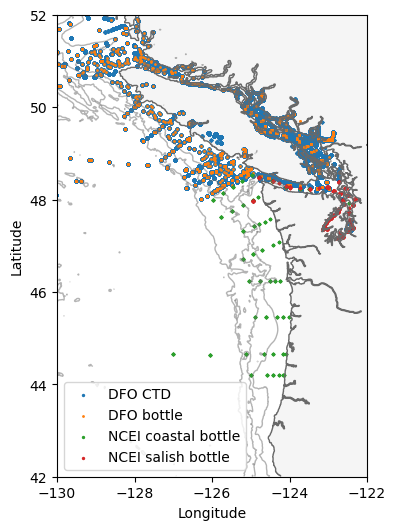

In [25]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([42,52])
ax.set_xlim([-130,-122])


# plot the location of observations
ax.scatter(ctd.lon, ctd.lat, s=2, label="DFO CTD")
ax.scatter(bot.lon, bot.lat, s=1, label="DFO bottle")
ax.scatter(nco.lon, nco.lat, s=2, label="NCEI coastal bottle")
ax.scatter(nsa.lon, nsa.lat, s=2, label="NCEI salish bottle")
ax.legend()


/tmp/ipykernel_149415/1873288718.py:5: UserWarning: linewidths is ignored by contourf
  ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')


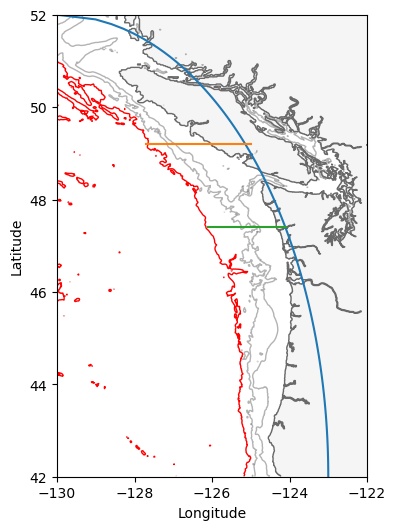

In [18]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

fig, ax = plt.subplots(1,1,figsize=(4, 6))

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000], colors='dimgray', alpha=0.5)
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[2000], colors='r')

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([42,52])
ax.set_xlim([-130,-122])

# salish sea cuttoff
y=np.linspace(42,52,100)
x = np.sqrt((1-((y-42)**2)/(10**2))*(7**2))-130
ax.plot(x,y)

#north cuttoff
ax.plot([-127.7,-125],[49.2,49.2])

# south cuttoff
ax.plot([-126.1,-124.1],[47.4,47.4])

In [17]:
ny = 49.2
sy = 47.4
d = 2000

# code for seperating observations into groups based on location and depth
def region(lat,lon,d):
    if d >= 2000:
        return 1 #offshore
    elif lon > np.sqrt((1-(((lat-42)**2)/(10**2)))*(7**2))-130 and lat < 51:
        return 2 #salish sea
    elif lat > ny:
        return 3 #north
    elif lat < sy:
        return 4 #south
    else:
        return 5 #domain


In [18]:
regions = ['Offshore', 'Salish Sea', 'North', 'South', 'Domain']
dfo_ctd['region'] = [region(dfo_ctd.lat[i],dfo_ctd.lon[i],dfo_ctd.h[i]) for i in range(len(dfo_ctd))]

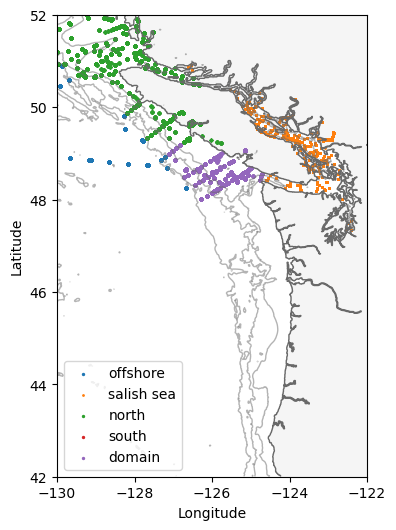

In [19]:
# quick visual check to see if seperated properly
fig, ax = plt.subplots(1,1,figsize=(4, 6))

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([42,52])
ax.set_xlim([-130,-122])


# plot the location of observations
ax.scatter(dfo_ctd.lon[dfo_ctd.region == 1], dfo_ctd.lat[dfo_ctd.region == 1], s=2, label="offshore")
ax.scatter(dfo_ctd.lon[dfo_ctd.region == 2], dfo_ctd.lat[dfo_ctd.region == 2], s=1, label="salish sea")
ax.scatter(dfo_ctd.lon[dfo_ctd.region == 3], dfo_ctd.lat[dfo_ctd.region == 3], s=2, label="north")
ax.scatter(dfo_ctd.lon[dfo_ctd.region == 4], dfo_ctd.lat[dfo_ctd.region == 4], s=2, label="south")
ax.scatter(dfo_ctd.lon[dfo_ctd.region == 5], dfo_ctd.lat[dfo_ctd.region == 5], s=2, label="domain")

ax.legend()

Evaluation of LiveOcean salinity compared to all DFO CTD casts (2017-2021) by region:


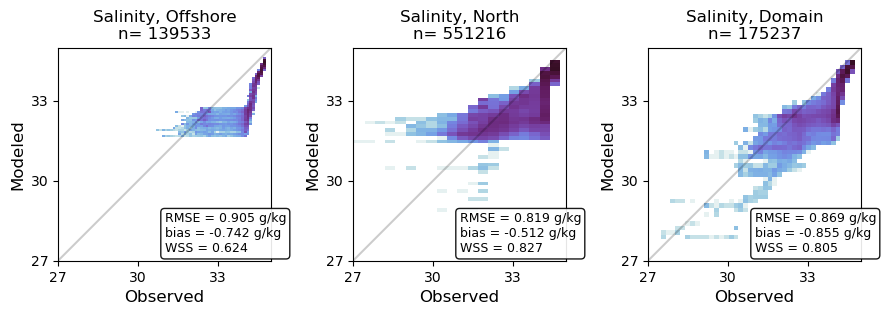

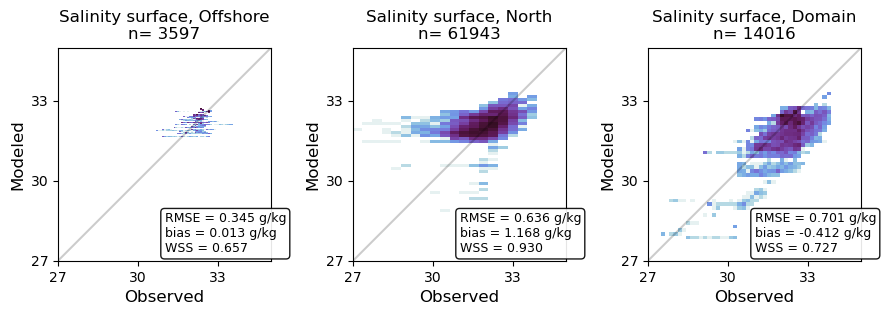

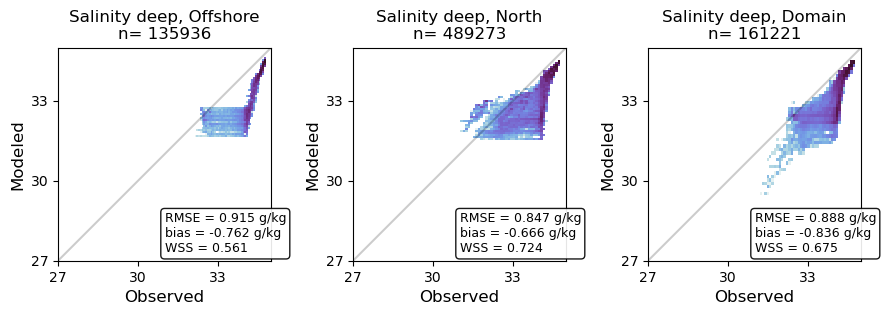

In [24]:
# evals of salinity by region
print("Evaluation of LiveOcean salinity compared to all DFO CTD casts (2017-2021) by region:")

fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

for i in range(len(regions)-2): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,5])[i]

    axs[i].plot((27,35),(27,35),'k-',alpha=.2)

    iiS=(~np.isnan(dfo_ctd.SA[dfo_ctd.region == r]))&(~np.isnan(dfo_ctd.SA_model[dfo_ctd.region == r]))

    counts, xedges, yedges, m2=axs[i].hist2d(dfo_ctd[dfo_ctd.region == r].loc[iiS,['SA']].values.flatten(),
                                        dfo_ctd[dfo_ctd.region == r].loc[iiS,['SA_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(27, 35, 3)
    axs[i].set_xlim((27,35))
    axs[i].set_ylim((27,35))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'Salinity, '+regions[r-1]+'\nn= '+str(len(dfo_ctd[dfo_ctd.region == r]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], dfo_ctd['SA'][dfo_ctd.region == r], dfo_ctd['SA_model'][dfo_ctd.region == r], (27,35), 'g/kg')

plt.tight_layout()

# at the surface (top 50 m)
d = -50
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

for i in range(len(regions)-2): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,5])[i]

    axs[i].plot((27,35),(27,35),'k-',alpha=.2)

    iiS=(~np.isnan(dfo_ctd.SA[(dfo_ctd.region == r) & (dfo_ctd.z > d)]))&(~np.isnan(dfo_ctd.SA_model[(dfo_ctd.region == r) & (dfo_ctd.z > d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z > d)].loc[iiS,['SA']].values.flatten(),
                                        dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z > d)].loc[iiS,['SA_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(27, 35, 3)
    axs[i].set_xlim((27,35))
    axs[i].set_ylim((27,35))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'Salinity surface, '+regions[r-1]+'\nn= '+str(len(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z > d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], dfo_ctd['SA'][(dfo_ctd.region == r) & (dfo_ctd.z > d)], dfo_ctd['SA_model'][(dfo_ctd.region == r) & (dfo_ctd.z > d)], (27,35), 'g/kg')

plt.tight_layout()

# deep (below 50 m)
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

for i in range(len(regions)-2): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,5])[i]

    axs[i].plot((27,35),(27,35),'k-',alpha=.2)

    iiS=(~np.isnan(dfo_ctd.SA[(dfo_ctd.region == r) & (dfo_ctd.z <= d)]))&(~np.isnan(dfo_ctd.SA_model[(dfo_ctd.region == r) & (dfo_ctd.z <= d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z <= d)].loc[iiS,['SA']].values.flatten(),
                                        dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z <= d)].loc[iiS,['SA_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(27, 35, 3)
    axs[i].set_xlim((27,35))
    axs[i].set_ylim((27,35))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'Salinity deep, '+regions[r-1]+'\nn= '+str(len(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z <= d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], dfo_ctd['SA'][(dfo_ctd.region == r) & (dfo_ctd.z <= d)], dfo_ctd['SA_model'][(dfo_ctd.region == r) & (dfo_ctd.z <= d)], (27,35), 'g/kg')

plt.tight_layout()


Evaluation of LiveOcean conservative temperature compared to all DFO CTD casts (2017-2021) by region:


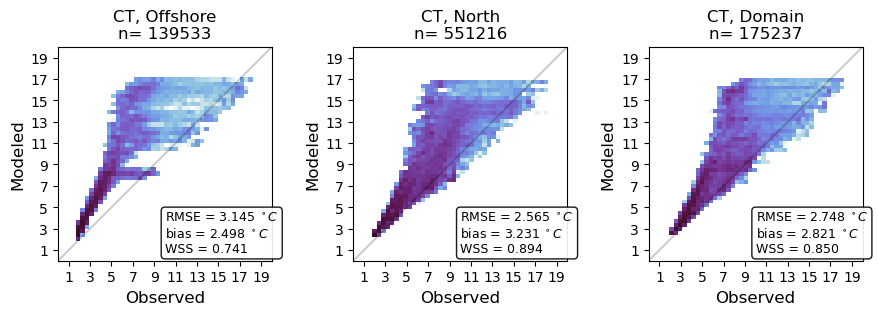

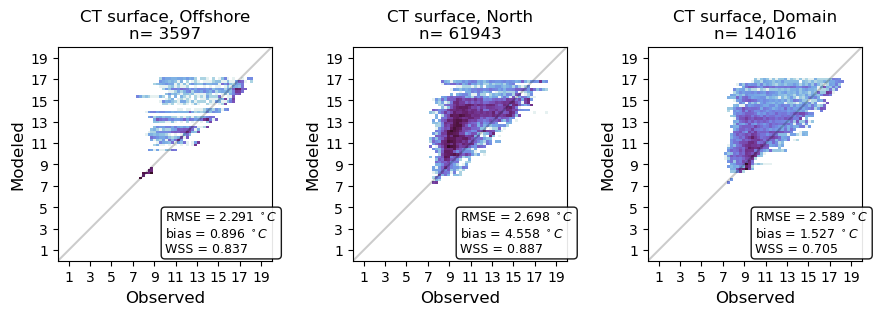

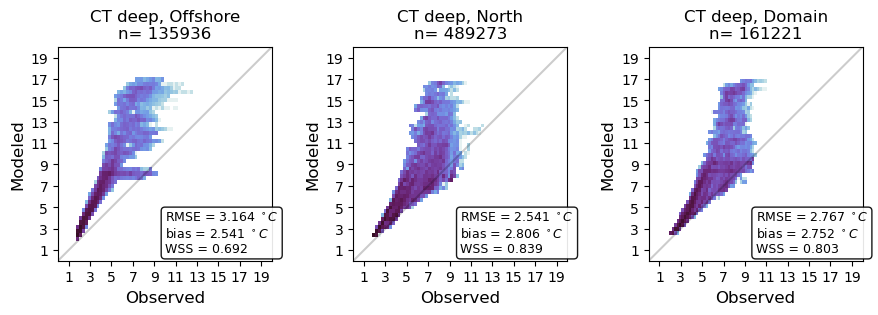

In [25]:
# evals of temperature by region
print("Evaluation of LiveOcean conservative temperature compared to all DFO CTD casts (2017-2021) by region:")

fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

for i in range(len(regions)-2): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,5])[i]

    axs[i].plot((0,20),(0,20),'k-',alpha=.2)

    iiS=(~np.isnan(dfo_ctd.CT[dfo_ctd.region == r]))&(~np.isnan(dfo_ctd.CT_model[dfo_ctd.region == r]))

    counts, xedges, yedges, m2=axs[i].hist2d(dfo_ctd[dfo_ctd.region == r].loc[iiS,['CT']].values.flatten(),
                                        dfo_ctd[dfo_ctd.region == r].loc[iiS,['CT_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(1, 21, 2)
    axs[i].set_xlim((0,20))
    axs[i].set_ylim((0,20))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'CT, '+regions[r-1]+'\nn= '+str(len(dfo_ctd[dfo_ctd.region == r]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], dfo_ctd['CT'][dfo_ctd.region == r], dfo_ctd['CT_model'][dfo_ctd.region == r], (0,20), '$^\circ C$')

plt.tight_layout()

#surface
d=-50

fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

for i in range(len(regions)-2): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,5])[i]

    axs[i].plot((0,20),(0,20),'k-',alpha=.2)

    iiS=(~np.isnan(dfo_ctd.CT[(dfo_ctd.region == r) & (dfo_ctd.z > d)]))&(~np.isnan(dfo_ctd.CT_model[(dfo_ctd.region == r) & (dfo_ctd.z > d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z > d)].loc[iiS,['CT']].values.flatten(),
                                        dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z > d)].loc[iiS,['CT_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(1, 21, 2)
    axs[i].set_xlim((0,20))
    axs[i].set_ylim((0,20))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'CT surface, '+regions[r-1]+'\nn= '+str(len(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z > d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], dfo_ctd['CT'][(dfo_ctd.region == r) & (dfo_ctd.z >d)], dfo_ctd['CT_model'][(dfo_ctd.region == r) & (dfo_ctd.z > d)], (0,20), '$^\circ C$')

plt.tight_layout()

#deep

fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

for i in range(len(regions)-2): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,5])[i]

    axs[i].plot((0,20),(0,20),'k-',alpha=.2)

    iiS=(~np.isnan(dfo_ctd.CT[(dfo_ctd.region == r) & (dfo_ctd.z <= d)]))&(~np.isnan(dfo_ctd.CT_model[(dfo_ctd.region == r) & (dfo_ctd.z <= d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z <= d)].loc[iiS,['CT']].values.flatten(),
                                        dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z <= d)].loc[iiS,['CT_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(1, 21, 2)
    axs[i].set_xlim((0,20))
    axs[i].set_ylim((0,20))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'CT deep, '+regions[r-1]+'\nn= '+str(len(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z <= d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], dfo_ctd['CT'][(dfo_ctd.region == r) & (dfo_ctd.z <= d)], dfo_ctd['CT_model'][(dfo_ctd.region == r) & (dfo_ctd.z <= d)], (0,20), '$^\circ C$')

plt.tight_layout()

Evaluation of LiveOcean dissolved oxygen compared to all DFO CTD casts (2017-2021) by region:


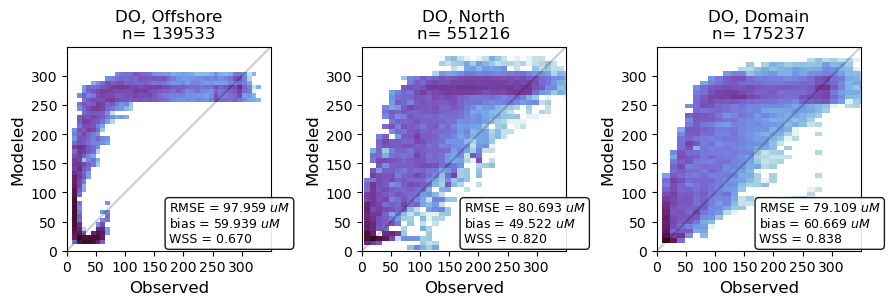

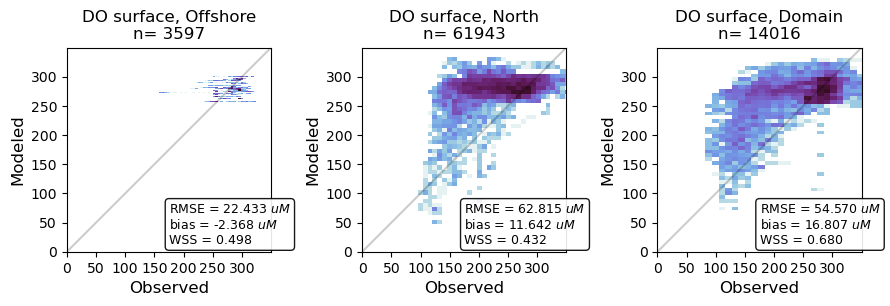

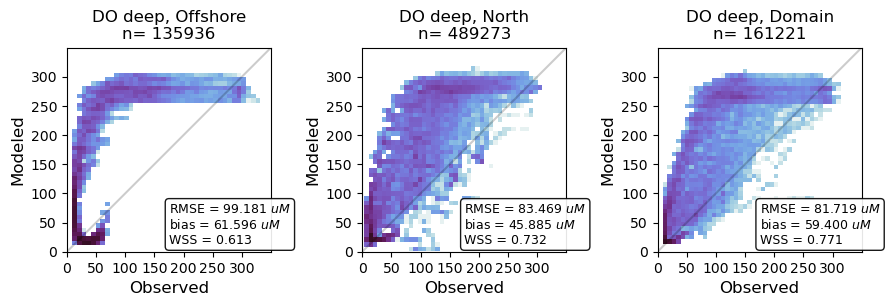

In [29]:
# evals of DO by region
print("Evaluation of LiveOcean dissolved oxygen compared to all DFO CTD casts (2017-2021) by region:")

fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

for i in range(len(regions)-2): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,5])[i]

    axs[i].plot((0,350),(0,350),'k-',alpha=.2)

    iiS=(~np.isnan(dfo_ctd['DO (uM)'][dfo_ctd.region == r]))&(~np.isnan(dfo_ctd.DO_model[dfo_ctd.region == r]))

    counts, xedges, yedges, m2=axs[i].hist2d(dfo_ctd[dfo_ctd.region == r].loc[iiS,['DO (uM)']].values.flatten(),
                                        dfo_ctd[dfo_ctd.region == r].loc[iiS,['DO_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(0,350, 50)
    axs[i].set_xlim((0,350))
    axs[i].set_ylim((0,350))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'DO, '+regions[r-1]+'\nn= '+str(len(dfo_ctd[dfo_ctd.region == r]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], dfo_ctd['DO (uM)'][dfo_ctd.region == r], dfo_ctd['DO_model'][dfo_ctd.region == r], (0,350), '$uM$')

plt.tight_layout()

#surface
d=-50
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

for i in range(len(regions)-2): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,5])[i]

    axs[i].plot((0,350),(0,350),'k-',alpha=.2)

    iiS=(~np.isnan(dfo_ctd['DO (uM)'][(dfo_ctd.region == r) & (dfo_ctd.z >d)]))&(~np.isnan(dfo_ctd.DO_model[(dfo_ctd.region == r) & (dfo_ctd.z >d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z >d)].loc[iiS,['DO (uM)']].values.flatten(),
                                        dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z >d)].loc[iiS,['DO_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(0,350, 50)
    axs[i].set_xlim((0,350))
    axs[i].set_ylim((0,350))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'DO surface, '+regions[r-1]+'\nn= '+str(len(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z >d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], dfo_ctd['DO (uM)'][(dfo_ctd.region == r) & (dfo_ctd.z >d)], dfo_ctd['DO_model'][(dfo_ctd.region == r) & (dfo_ctd.z >d)], (0,350), '$uM$')

plt.tight_layout()

#deep 
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

for i in range(len(regions)-2): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,5])[i]

    axs[i].plot((0,350),(0,350),'k-',alpha=.2)

    iiS=(~np.isnan(dfo_ctd['DO (uM)'][(dfo_ctd.region == r) & (dfo_ctd.z <= d)]))&(~np.isnan(dfo_ctd.DO_model[(dfo_ctd.region == r) & (dfo_ctd.z <= d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z <= d)].loc[iiS,['DO (uM)']].values.flatten(),
                                        dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z <= d)].loc[iiS,['DO_model']].values.flatten(),bins=40,norm=LogNorm(),cmap=cm.dense)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(0,350, 50)
    axs[i].set_xlim((0,350))
    axs[i].set_ylim((0,350))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'DO deep, '+regions[r-1]+'\nn= '+str(len(dfo_ctd[(dfo_ctd.region == r) & (dfo_ctd.z <= d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], dfo_ctd['DO (uM)'][(dfo_ctd.region == r) & (dfo_ctd.z <= d)], dfo_ctd['DO_model'][(dfo_ctd.region == r) & (dfo_ctd.z <= d)], (0,350), '$uM$')

plt.tight_layout()

